In [2]:
import numpy as np
from transformers import AutoModelForAudioClassification, AutoFeatureExtractor
import torch
import librosa

# Load the model and feature extractor
model_name = "danilotpnta/HuBERT-Genre-Clf"
model = AutoModelForAudioClassification.from_pretrained(model_name)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

# Load and preprocess the audio file
# Replace 'path_to_audio_file' with the actual path to your audio file
audio_file = '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00000.wav'
audio_input, _ = librosa.load(audio_file, sr=16000)

# Prepare the input
inputs = feature_extractor(audio_input, sampling_rate=16000, return_tensors="pt")

# Get the embeddings from the model
with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)
    embeddings = outputs.hidden_states[-1].squeeze().numpy()

# Now embeddings contain the output from the last hidden layer before the classification head
print(embeddings.shape)


Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

(1500, 768)


In [3]:
import numpy as np
from transformers import pipeline

# Load the model and feature extractor
model_name = "danilotpnta/HuBERT-Genre-Clf"
pipe = pipeline("audio-classification", model=model_name)
file_paths = [
    '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00000.wav',
    '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00001.wav', 
]

for file_path in file_paths:
    # Get the prediction
    prediction = pipe(file_path)

    # Print the prediction
    print(prediction)

Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

[{'score': 0.9889065027236938, 'label': 'blues'}, {'score': 0.003469008719548583, 'label': 'reggae'}, {'score': 0.0031038543675094843, 'label': 'country'}, {'score': 0.0012032481608912349, 'label': 'rock'}, {'score': 0.0011983835138380527, 'label': 'jazz'}]
[{'score': 0.9871615767478943, 'label': 'blues'}, {'score': 0.004276949912309647, 'label': 'reggae'}, {'score': 0.004169115796685219, 'label': 'country'}, {'score': 0.0017608506605029106, 'label': 'jazz'}, {'score': 0.0008791231666691601, 'label': 'rock'}]


In [3]:
import torchaudio
import torch
from transformers import Wav2Vec2FeatureExtractor, HubertForSequenceClassification

# Load the feature extractor and model
model_name = "danilotpnta/HuBERT-Genre-Clf"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = HubertForSequenceClassification.from_pretrained(model_name)

# Function to get embeddings from audio file
def get_embeddings(file_path):
    # Load audio
    speech, _ = torchaudio.load(file_path)
    
    # Process the audio file
    inputs = feature_extractor(speech.squeeze().numpy(), sampling_rate=16000, return_tensors="pt", padding=True)
    
    with torch.no_grad():
        # Get the embeddings from the model
        outputs = model(**inputs, output_hidden_states=True)
    
    # Extract the hidden states
    hidden_states = outputs.hidden_states
    
    # Select the desired hidden state (e.g., the last hidden state)
    embeddings = hidden_states[-1].squeeze().numpy()
    
    return embeddings

# List of file paths
file_paths = [
    '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00000.wav',
    '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00001.wav', 
]

# Get and print embeddings for each file
for file_path in file_paths:
    embeddings = get_embeddings(file_path)
    print(f"Embeddings for {file_path}: {embeddings.shape}")


Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

Embeddings for /Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00000.wav: (2067, 768)
Embeddings for /Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres/blues/blues.00001.wav: (2067, 768)


Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

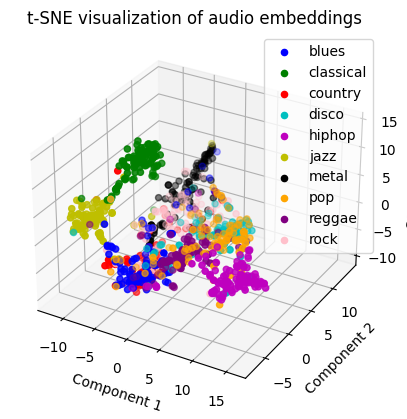

In [8]:
import os
import torchaudio
import torch
from transformers import Wav2Vec2FeatureExtractor, HubertForSequenceClassification
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import csv

# Load the feature extractor and model
model_name = "danilotpnta/HuBERT-Genre-Clf"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = HubertForSequenceClassification.from_pretrained(model_name)

# Function to get embeddings from audio file
def get_embeddings(file_path):
    try:
        # Load audio
        speech, _ = torchaudio.load(file_path)
        
        # Process the audio file
        inputs = feature_extractor(speech.squeeze().numpy(), sampling_rate=16000, return_tensors="pt", padding=True)
        
        with torch.no_grad():
            # Get the embeddings from the model
            outputs = model(**inputs, output_hidden_states=True)
        
        # Extract the hidden states
        hidden_states = outputs.hidden_states
        
        # Select the desired hidden state (e.g., the last hidden state)
        embeddings = hidden_states[-1].squeeze().numpy()
        
        # Mean pooling
        mean_embeddings = np.mean(embeddings, axis=0)
        
        return mean_embeddings, None
    
    except Exception as e:
        return None, str(e)

# Assuming your dataset structure is /path/to/gtzan/genres/genre_name/musicfile.wav
data_dir = '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres'  # Adjust this path
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

embeddings = []
labels = []
failed_files = []

# Iterate over each genre and file to get embeddings
for genre in tqdm(genres, desc="Processing genres"):
    genre_dir = os.path.join(data_dir, genre)
    for file_name in tqdm(os.listdir(genre_dir), desc=f"Processing {genre}", leave=False):
        file_path = os.path.join(genre_dir, file_name)
        embedding, error_message = get_embeddings(file_path)
        if embedding is not None:
            embeddings.append(embedding)
            labels.append(genre)
        else:
            failed_files.append((file_path, error_message))

# Convert lists to numpy arrays
embeddings = np.array(embeddings)
labels = np.array(labels)

# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Map each genre to a unique color
colors = {
    'blues': 'b', 'classical': 'g', 'country': 'r', 'disco': 'c', 'hiphop': 'm',
    'jazz': 'y', 'metal': 'k', 'pop': 'orange', 'reggae': 'purple', 'rock': 'pink'
}

for genre in genres:
    indices = labels == genre
    ax.scatter(embeddings_3d[indices, 0], embeddings_3d[indices, 1], embeddings_3d[indices, 2], 
               c=colors[genre], label=genre)

ax.set_title('t-SNE visualization of audio embeddings')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.show()

# Save the failed files to a CSV
failed_files_csv = '/Users/datoapanta/Desktop/mma_2024/dataset/data/error_embeddings/failed_files.csv'  # Adjust this path
with open(failed_files_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['File Path', 'Error Message'])
    csvwriter.writerows(failed_files)


In [22]:
type(embeddings[0])

numpy.ndarray

In [11]:
# add embeddings to dataframe
import pandas as pd
df =pd.read_csv('/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/metadata.csv')

In [12]:
genres = pd.DataFrame(labels, columns=['genre'])

In [14]:
type(labels)

numpy.ndarray

In [27]:
import numpy as np

# Assuming arr is your original array
labels_1000 = np.array([labels])

# Insert 'jazz.00054.wav' at position 554 (since numpy array index starts from 0)
labels_1000 = np.insert(labels_1000, 554, 'jazz')
print(labels_1000.shape)

(1000,)


Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

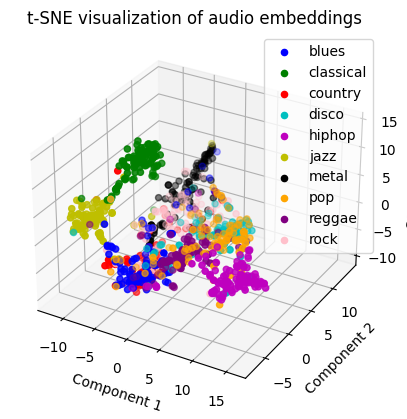

In [2]:
import os
import torchaudio
import torch
from transformers import Wav2Vec2FeatureExtractor, HubertForSequenceClassification
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import csv

# Load the feature extractor and model
model_name = "danilotpnta/HuBERT-Genre-Clf"
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
model = HubertForSequenceClassification.from_pretrained(model_name)

# Function to get embeddings from audio file
def get_embeddings(file_path):
    try:
        # Load audio
        speech, _ = torchaudio.load(file_path)
        
        # Process the audio file
        inputs = feature_extractor(speech.squeeze().numpy(), sampling_rate=16000, return_tensors="pt", padding=True)
        
        with torch.no_grad():
            # Get the embeddings from the model
            outputs = model(**inputs, output_hidden_states=True)
        
        # Extract the hidden states
        hidden_states = outputs.hidden_states
        
        # Select the desired hidden state (e.g., the last hidden state)
        embeddings = hidden_states[-1].squeeze().numpy()
        
        # Mean pooling
        mean_embeddings = np.mean(embeddings, axis=0)
        
        return mean_embeddings, None
    
    except Exception as e:
        return None, str(e)

# Assuming your dataset structure is /path/to/gtzan/genres/genre_name/musicfile.wav
data_dir = '/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres'  # Adjust this path
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

embeddings = []
labels = []
failed_files = []

# Iterate over each genre and file to get embeddings
for genre in tqdm(genres, desc="Processing genres"):
    genre_dir = os.path.join(data_dir, genre)
    for file_name in tqdm(os.listdir(genre_dir), desc=f"Processing {genre}", leave=False):
        file_path = os.path.join(genre_dir, file_name)
        embedding, error_message = get_embeddings(file_path)
        if embedding is not None:
            embeddings.append(embedding)
            labels.append(genre)
        else:
            failed_files.append((file_path, error_message))

# Convert lists to numpy arrays
embeddings = np.array(embeddings)
labels = np.array(labels)

# Save the failed files to a CSV
failed_files_csv = '/Users/datoapanta/Desktop/mma_2024/dataset/data/error_embeddings/failed_files.csv'  # Adjust this path
with open(failed_files_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['File Path', 'Error Message'])
    csvwriter.writerows(failed_files)

In [9]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.manifold import TSNE
import pandas as pd

# Parameters for t-SNE
perplexity = 30  # Try values between 5 and 50
learning_rate = 200  # Try values between 10 and 1000
n_iter = 4000  # Number of iterations, higher can lead to better convergence

# Perform t-SNE with adjusted parameters
tsne = TSNE(n_components=3, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Convert to a DataFrame for easier handling
df = pd.DataFrame(embeddings_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Genre'] = labels

# Map each genre to a valid Plotly color
colors = {
    'blues': 'blue', 'classical': 'green', 'country': 'red', 'disco': 'cyan', 'hiphop': 'magenta',
    'jazz': 'yellow', 'metal': 'black', 'pop': 'orange', 'reggae': 'purple', 'rock': 'pink'
}

# Plotting with Plotly
fig = px.scatter_3d(df, x='Component 1', y='Component 2', z='Component 3', color='Genre',
                    color_discrete_map=colors, title='t-SNE visualization of audio embeddings')

fig.update_layout(scene=dict(
                    xaxis_title='Component 1',
                    yaxis_title='Component 2',
                    zaxis_title='Component 3'),
                  legend_title='Genre',
                  height=800)  # Increase the height of the figure

fig.show()

In [57]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.manifold import TSNE
import pandas as pd

# Parameters for t-SNE
perplexity = 25  # Try values between 5 and 50
learning_rate = 100  # Try values between 10 and 1000
n_iter = 1000  # Number of iterations, higher can lead to better convergence

# Perform t-SNE with adjusted parameters
tsne = TSNE(n_components=3, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

# Convert to a DataFrame for easier handling
df = pd.DataFrame(embeddings_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Genre'] = labels

# Map each genre to a valid Plotly color
colors = {
    'blues': 'blue', 'classical': 'green', 'country': 'red', 'disco': 'cyan', 'hiphop': 'magenta',
    'jazz': 'yellow', 'metal': 'black', 'pop': 'orange', 'reggae': 'purple', 'rock': 'pink'
}

# Plotting with Plotly
fig = px.scatter_3d(df, x='Component 1', y='Component 2', z='Component 3', color='Genre',
                    color_discrete_map=colors, title='t-SNE visualization of audio embeddings')

fig.update_layout(scene=dict(
                    xaxis_title='Component 1',
                    yaxis_title='Component 2',
                    zaxis_title='Component 3'),
                  legend_title='Genre',
                  height=800)  # Increase the height of the figure

fig.show()

In [56]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the data
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply PCA and determine the number of components to retain 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
embeddings_pca = pca.fit_transform(embeddings_scaled)

# Parameters for t-SNE
perplexity = 10  # Try values between 5 and 50
learning_rate = 100  # Try values between 10 and 1000
n_iter = 1000  # Number of iterations, higher can lead to better convergence

# Perform t-SNE with adjusted parameters for 3D
tsne = TSNE(n_components=3, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
# tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_pca)

# Convert to a DataFrame for easier handling
df = pd.DataFrame(embeddings_3d, columns=['Component 1', 'Component 2', 'Component 3'])
df['Genre'] = labels

# Map each genre to a valid Plotly color
colors = {
    'blues': 'blue', 'classical': 'green', 'country': 'red', 'disco': 'cyan', 'hiphop': 'magenta',
    'jazz': 'yellow', 'metal': 'black', 'pop': 'orange', 'reggae': 'purple', 'rock': 'pink'
}

# Plotting with Plotly
fig = px.scatter_3d(df, x='Component 1', y='Component 2', z='Component 3', color='Genre',
                    color_discrete_map=colors, title='t-SNE visualization of audio embeddings')

fig.update_layout(scene=dict(
                    xaxis_title='Component 1',
                    yaxis_title='Component 2',
                    zaxis_title='Component 3'),
                  legend_title='Genre',
                  height=800)  # Increase the height of the figure

fig.show()



In [65]:
import plotly.express as px
from sklearn.manifold import TSNE
import pandas as pd

# Parameters for t-SNE
perplexity = 30  # Try values between 5 and 50
learning_rate = 200  # Try values between 10 and 1000
n_iter = 1000  # Number of iterations, higher can lead to better convergence

# Perform t-SNE with adjusted parameters for 2D
tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Convert to a DataFrame for easier handling
df = pd.DataFrame(embeddings_2d, columns=['Component 1', 'Component 2'])
df['Genre'] = labels

# Map each genre to a valid Plotly color
colors = {
    'blues': 'blue', 'classical': 'green', 'country': 'red', 'disco': 'cyan', 'hiphop': 'magenta',
    'jazz': 'yellow', 'metal': 'black', 'pop': 'orange', 'reggae': 'purple', 'rock': 'pink'
}

# Plotting with Plotly
fig = px.scatter(df, x='Component 1', y='Component 2', color='Genre',
                 color_discrete_map=colors, title='t-SNE visualization of audio embeddings')

fig.update_layout(
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    legend_title='Genre',
    height=800  # Increase the height of the figure
)

fig.show()


In [3]:
# Position where the empty row should be added
position = 553

# Create an empty row
empty_row = np.zeros((1, 768))

# Split the embeddings array into two parts
part1 = embeddings[:position+1]
part2 = embeddings[position+1:]

# Concatenate part1, the empty row, and part2
new_embeddings = np.concatenate((part1, empty_row, part2), axis=0)

print(new_embeddings.shape)  # Should print (1000, 768)

(1000, 768)


In [67]:
import pandas as pd

# Assuming new_embeddings is a numpy array or a list of lists with shape (1000, 768)
embeddings_1000 = pd.DataFrame(new_embeddings).values.tolist()

# Read the original metadata CSV file into a DataFrame
df_with_embeddings = pd.read_csv('/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/metadata.csv')

# Insert the embeddings as a new column in the DataFrame
df_with_embeddings.insert(7, 'embeddings', embeddings_1000)


In [68]:
df_with_embeddings.to_csv("/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/metadata_embeddings.csv", index=False)


In [66]:
# Save the embeddings to a specific directory
np.save('/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/embeddings.npy', embeddings)

# Load the embeddings from the specific directory
# loaded_embeddings = np.load('/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/embeddings.npy')


In [73]:
df_with_embeddings = pd.read_csv("/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/metadata.csv")
df_with_embeddings = df_with_embeddings.drop(554, axis=0)
df_with_embeddings.to_csv("/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/metadata_new.csv", index=False)


In [75]:
for root, dirs, files in os.walk('/Users/datoapanta/Desktop/mma_2024/dataset/data/gtzan/genres'):
    for file in files:
        print(file)

.DS_Store
pop.00027.wav
pop.00033.wav
pop.00032.wav
pop.00026.wav
pop.00030.wav
pop.00024.wav
pop.00018.wav
pop.00019.wav
pop.00025.wav
pop.00031.wav
pop.00009.wav
pop.00035.wav
pop.00021.wav
pop.00020.wav
pop.00034.wav
pop.00008.wav
pop.00022.wav
pop.00036.wav
pop.00037.wav
pop.00023.wav
pop.00044.wav
pop.00050.wav
pop.00078.wav
pop.00087.wav
pop.00093.wav
pop.00092.wav
pop.00086.wav
pop.00079.wav
pop.00051.wav
pop.00045.wav
pop.00053.wav
pop.00047.wav
pop.00090.wav
pop.00084.wav
pop.00085.wav
pop.00091.wav
pop.00046.wav
pop.00052.wav
pop.00056.wav
pop.00042.wav
pop.00095.wav
pop.00081.wav
pop.00080.wav
pop.00094.wav
pop.00043.wav
pop.00057.wav
pop.00069.wav
pop.00041.wav
pop.00055.wav
pop.00082.wav
pop.00096.wav
pop.00097.wav
pop.00083.wav
pop.00054.wav
pop.00040.wav
pop.00068.wav
pop.00065.wav
pop.00071.wav
pop.00059.wav
pop.00058.wav
pop.00070.wav
pop.00064.wav
pop.00072.wav
pop.00066.wav
pop.00099.wav
pop.00098.wav
pop.00067.wav
pop.00073.wav
pop.00077.wav
pop.00063.wav
pop.00088.

In [4]:
# find the genre probabilities for all audio files from the genre folder
import os
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

# Load the model and feature extractor
model_name = "danilotpnta/HuBERT-Genre-Clf"
pipe = pipeline("audio-classification", model=model_name)
audio_paths = [os.path.join("/Users/datoapanta/Desktop/rnd_songs", f) for f in os.listdir("/Users/datoapanta/Desktop/rnd_songs") if f.endswith(".wav")]

for audio_path in tqdm(audio_paths, desc="Processing audio files"):
    prediction = pipe(audio_path)
    print(audio_path, prediction)

Some weights of the model checkpoint at danilotpnta/HuBERT-Genre-Clf were not used when initializing HubertForSequenceClassification: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at danilotpnta/HuBERT-Genre-Clf and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametriza

/Users/datoapanta/Desktop/rnd_songs/country3_rnd.wav [{'score': 0.9869296550750732, 'label': 'country'}, {'score': 0.005227359011769295, 'label': 'pop'}, {'score': 0.004422000143676996, 'label': 'rock'}, {'score': 0.0016276288079097867, 'label': 'blues'}, {'score': 0.0006452538073062897, 'label': 'jazz'}]
